### Train Set과 Test Set의 필요성
- 모든 문제와 답을 알려주고 해당 범위내에서 점수를 내면 항상 100점이 나온다.
- 하나의 DataSet을 Train부분과 Test부분으로 분리하여
- Train Set으로 학습하고 학습내용은 Test Set으로 검증을 하여야 모델의 정확한 정확도를 신뢰할 수 있다.

In [67]:
import pandas as pd

In [68]:
fruits = pd.read_csv('../Data/fruits.csv')

fruits.head()


,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Train Set과 Test Set 분리


In [69]:
# Train Set
train_input = fruits.loc[:,['length','weight']]
train_input.head()


,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [70]:
train_target = fruits.loc[:,['name']]
train_target.head()

,name
0,apple
1,apple
2,apple
3,apple
4,apple


In [71]:
# train set의 갯수 확인하기
len(train_input) == len(train_target)

True

---
### Test Set

In [72]:
test_input = fruits.loc[35:,['length','weight']]
test_input

,length,weight
35,9.8,6.7
36,10.5,7.5
37,10.6,7.0
38,11.0,9.7
39,11.2,9.8
40,11.3,8.7
41,11.8,10.0
42,11.8,9.9
43,12.0,9.8
44,12.2,12.2


In [73]:
test_target = fruits.loc[35:,'name']
test_target

35    berry
36    berry
37    berry
38    berry
39    berry
40    berry
41    berry
42    berry
43    berry
44    berry
45    berry
46    berry
47    berry
48    berry
Name: name, dtype: object

In [74]:
# 갯수 검증
len(test_input) == len(test_target)

True

### kNN을 이용한 분류

In [75]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# 모델 만들기
kn = KNeighborsClassifier()

In [77]:
# 학습 시키기
kn.fit(train_input, train_target)

c:\Users\TJ\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [78]:
# 평가하기
kn.score(test_input, test_target)

1.0

> 샘플링 편항이 발생하였다.

### Numpy를 이용하여 샘플링 편항 제거하기

In [79]:
import numpy as np

In [80]:
np.random.seed(42) # random sample을 하나로 정의하여 다른 모델에서 동일한 값으로 테스트
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [81]:
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [82]:
# train으로 사용될 index 번호
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [83]:
fruits

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple
5,29.7,450.0,apple
6,29.7,500.0,apple
7,30.0,390.0,apple
8,30.0,450.0,apple
9,30.7,500.0,apple


In [84]:
# train data 구성하기
train_input = fruits.loc[index[:35], ['length', 'weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [85]:
# train_target
train_target = fruits.loc[index[:35], ['name']]
train_target.head()

,name
13,apple
45,berry
47,berry
44,berry
17,apple


In [86]:
# test로 사용할 번호
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [87]:
# test input
test_input = fruits.loc[index[35:], ['length', 'weight']]
test_input.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [88]:
# test_target
test_target = fruits.loc[index[35:], ['name']]
test_target.head()

,name
37,berry
35,berry
23,apple
39,berry
10,apple


### Data의 분포를 산포도로 확인하기

In [89]:
import matplotlib.pyplot as plt

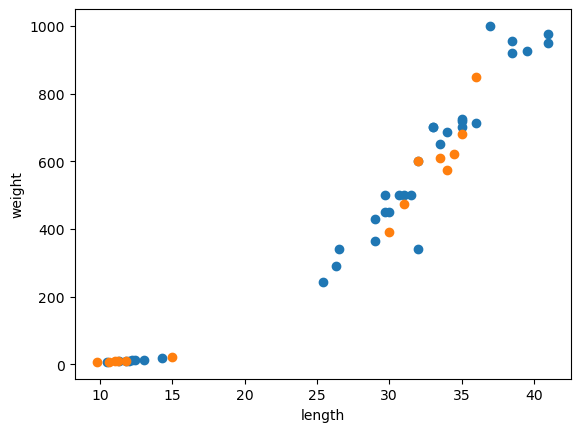

In [90]:
plt.scatter(
    train_input.length,
    train_input.weight
)

plt.scatter(
    test_input.length,
    test_input.weight
)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

# kNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
kn = KNeighborsClassifier()

In [93]:
kn.fit(train_input, train_target)

c:\Users\TJ\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [94]:
kn.score(test_input, test_target)

1.0

---
### sklearn으로 Train Set과 Test Set 나누기

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Feature와 Target 분리하기
fruits_data = fruits[['length', 'weight']]
fruits_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [97]:
fruits_target = fruits['name']
fruits_target

0     apple
1     apple
2     apple
3     apple
4     apple
5     apple
6     apple
7     apple
8     apple
9     apple
10    apple
11    apple
12    apple
13    apple
14    apple
15    apple
16    apple
17    apple
18    apple
19    apple
20    apple
21    apple
22    apple
23    apple
24    apple
25    apple
26    apple
27    apple
28    apple
29    apple
30    apple
31    apple
32    apple
33    apple
34    apple
35    berry
36    berry
37    berry
38    berry
39    berry
40    berry
41    berry
42    berry
43    berry
44    berry
45    berry
46    berry
47    berry
48    berry
Name: name, dtype: object

In [98]:
train_input, test_input, train_target, test_target = train_test_split(
    fruits_data,
    fruits_target,
    random_state=42
)

In [99]:
# 크기 확인(Dimension 확인)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(36, 2) (36,)
(13, 2) (13,)


In [100]:
# 빈도수 확인
import collections

In [101]:
# 모집단의 성격
collections.Counter(fruits['name'])

Counter({'apple': 35, 'berry': 14})

In [102]:
35 / 14

2.5

In [103]:
# train_target의 빈도수
collections.Counter(train_target)

Counter({'apple': 25, 'berry': 11})

In [104]:
25 / 11

2.272727272727273

In [105]:
# test target의 빈도수
collections.Counter(test_target)

Counter({'apple': 10, 'berry': 3})

In [106]:
10 / 3

3.3333333333333335

> apple과 berry의 비율을 비숫하게 할 필요가 있다. --> Sampling의 기본

In [107]:
# 모집단의 성격을 유지시킨다.

train_input, test_input, train_target, test_target = train_test_split(
    fruits_data,
    fruits_target,
    random_state=42,
    stratify=fruits['name'],    # 중요한 키워드. fruits['name']의 비율을 유지시킨다.
)

In [108]:
# train_target의 빈도수
collections.Counter(train_target)

Counter({'apple': 26, 'berry': 10})

In [109]:
26 / 10

2.6

In [110]:
# test target의 빈도수
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [111]:
9 / 4

2.25

In [112]:
# 학습 시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [113]:
# 평가하기
kn.score(test_input, test_target)

1.0